**"Predict the train ticket price"**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import linear_model
# la otra forma, pero lo mismo: from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
from sklearn.preprocessing import LabelEncoder
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("train_set.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19452 entries, 0 to 19451
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   origin             19452 non-null  object 
 1   destination        19452 non-null  object 
 2   train_type         19452 non-null  object 
 3   train_class        19452 non-null  object 
 4   fare               19452 non-null  object 
 5   start_date_hour    19452 non-null  int64  
 6   start_date_minute  19452 non-null  int64  
 7   end_date_hour      19452 non-null  int64  
 8   end_date_minute    19452 non-null  int64  
 9   date_day           19452 non-null  int64  
 10  price              19452 non-null  float64
dtypes: float64(1), int64(5), object(5)
memory usage: 1.6+ MB


In [6]:
df.head()

,origin,destination,train_type,train_class,fare,start_date_hour,start_date_minute,end_date_hour,end_date_minute,date_day,price
0,VALLADOLID,MADRID,AVANT,Turista,Adulto ida,8,45,9,50,1,31.1
1,MADRID,ZARAGOZA,AVE,Turista,Promo,11,30,12,51,4,44.0
2,MADRID,ZARAGOZA,AVE,Turista,Flexible,8,20,9,35,2,55.7
3,MADRID,TARRAGONA,AVE,Turista,Flexible,7,30,10,3,2,82.6
4,VALLADOLID,MADRID,AVANT,Turista,Adulto ida,20,35,21,40,4,31.1


La hora de salida de los trenes está indicada por dos columnas, la de la hora y la de los minutos. La voy a unificar en una columna donde la hora este indicada en formato decimal (el lugar de sexagesimal), que llamaré 'hour_star_decimal'. Con la hora de llegada actuaré de igual manera y se llamará 'hour_end_decimal'.

In [4]:
df['hour_star_decimal'] = df['start_date_hour'] + round(df['start_date_minute']/60, 4)
df['hour_star_decimal']
df['hour_end_decimal'] = df['end_date_hour'] + round(df['end_date_minute']/60, 4)
df['hour_end_decimal']

0         9.8333
1        12.8500
2         9.5833
3        10.0500
4        21.6667
          ...   
19447     9.2500
19448    11.9500
19449    17.7500
19450    13.1667
19451    21.6667
Name: hour_end_decimal, Length: 19452, dtype: float64

In [8]:
df.head()

,origin,destination,train_type,train_class,fare,start_date_hour,start_date_minute,end_date_hour,end_date_minute,date_day,price,hour_star_decimal,hour_end_decimal
0,VALLADOLID,MADRID,AVANT,Turista,Adulto ida,8,45,9,50,1,31.1,8.7500,9.8333
1,MADRID,ZARAGOZA,AVE,Turista,Promo,11,30,12,51,4,44.0,11.5000,12.8500
2,MADRID,ZARAGOZA,AVE,Turista,Flexible,8,20,9,35,2,55.7,8.3333,9.5833
3,MADRID,TARRAGONA,AVE,Turista,Flexible,7,30,10,3,2,82.6,7.5000,10.0500
4,VALLADOLID,MADRID,AVANT,Turista,Adulto ida,20,35,21,40,4,31.1,20.5833,21.6667


In [5]:
dfX = df.drop(['start_date_hour', 'start_date_minute','end_date_hour','end_date_minute','price'], axis=1)
dfX.head()

,origin,destination,train_type,train_class,fare,date_day,hour_star_decimal,hour_end_decimal
0,VALLADOLID,MADRID,AVANT,Turista,Adulto ida,1,8.7500,9.8333
1,MADRID,ZARAGOZA,AVE,Turista,Promo,4,11.5000,12.8500
2,MADRID,ZARAGOZA,AVE,Turista,Flexible,2,8.3333,9.5833
3,MADRID,TARRAGONA,AVE,Turista,Flexible,2,7.5000,10.0500
4,VALLADOLID,MADRID,AVANT,Turista,Adulto ida,4,20.5833,21.6667


In [6]:
# Aplico Encode a las columnas categóricas.
df_categorical_no_numbers = dfX[df.select_dtypes('object').columns].apply(LabelEncoder().fit_transform)
df_categorical_no_numbers.head()

,origin,destination,train_type,train_class,fare
0,3,1,1,1,0
1,1,4,2,1,3
2,1,4,2,1,2
3,1,2,2,1,2
4,3,1,1,1,0


In [7]:
#El resto de las columnas será
df_others = dfX.select_dtypes(exclude=['object'])
df_others.head()

,date_day,hour_star_decimal,hour_end_decimal
0,1,8.7500,9.8333
1,4,11.5000,12.8500
2,2,8.3333,9.5833
3,2,7.5000,10.0500
4,4,20.5833,21.6667


In [8]:
# Aplico normalización a las columnas numericas que están en el df_others
#from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_others_normalized = pd.DataFrame(
    data=scaler.fit_transform(df_others.values), 
    columns=df_others.columns, 
    index=df_others.index)

In [9]:
# Dataframe con valores categoricos encode más valores numéricos y columnas ordenadas.
df1 = pd.concat([df_categorical_no_numbers,df_others_normalized], axis=1)
df1

,origin,destination,train_type,train_class,fare,date_day,hour_star_decimal,hour_end_decimal
0,3,1,1,1,0,0.000000,0.172755,0.408261
1,1,4,2,1,3,0.500000,0.335637,0.535013
2,1,4,2,1,2,0.166667,0.148074,0.397756
3,1,2,2,1,2,0.166667,0.098718,0.417366
4,3,1,1,1,0,0.500000,0.873639,0.905462
...,...,...,...,...,...,...,...,...
19447,4,1,2,1,3,0.000000,0.116487,0.383752
19448,1,2,2,1,2,0.333333,0.217178,0.497197
19449,1,4,2,1,2,0.500000,0.631786,0.740895
19450,2,1,2,1,2,0.000000,0.279369,0.548319


1. Definir X e y

In [10]:
X = df1.values
y = df.price.values

In [11]:
X.shape

(19452, 8)

In [12]:
y.shape

(19452,)

In [30]:
df_graf = pd.concat([df1, df['price']], axis=1)

In [ ]:
sns.pairplot(df_graf) 

<AxesSubplot:>

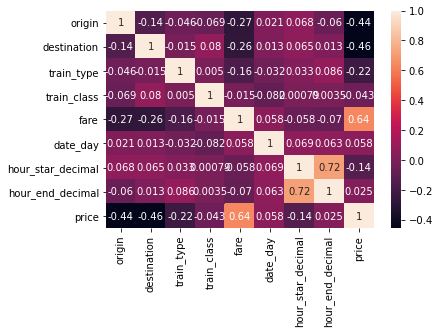

In [13]:
# Muestro la matriz de correlación
sns.heatmap(df_graf.corr(), annot = True)

#### 2. Dividir X_train, X_test, y_train, y_test

In [13]:
# Divido la muestra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7)

#### 3. Asignar el modelo (vacío) a una variable
Aquí se pondrían los parámetros

In [14]:
# Creo el modelo
model = linear_model.LinearRegression(n_jobs=-1)

#### 4. Entrenar el modelo con X_train, y_train

In [15]:
# Entreno el modelo
model.fit(X_train, y_train)

LinearRegression(n_jobs=-1)

In [16]:
# Nos da las pendientes de las rectas
coeff_df = pd.DataFrame(model.coef_, df1.columns, columns=['Coefficient'])
coeff_df

,Coefficient
origin,-7.734257
destination,-8.051148
train_type,-5.141248
train_class,-3.236009
fare,7.341113
date_day,3.542628
hour_star_decimal,-18.443763
hour_end_decimal,23.557135


5. Predecir con el modelo ya entrenado con X_test/to_pred

In [17]:
predictions = model.predict(X_test)

In [18]:
print('MAE:', mean_absolute_error(y_test, predictions))
print('MSE:',mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))

MAE: 12.205607816398983
MSE: 224.94519330859498
RMSE: 14.99817299902208


#### 5. Predecir con el modelo ya entrenado con X_test/to_pred

In [19]:
predictions = model.predict(X_test)
print(predictions)

[90.20121197 90.56952587 91.50009132 ... 21.77565935 41.01275835
 57.41667376]


#### 6. Sacar métricas, valorar el modelo 

In [59]:
model.score(X_test,y_test)

0.6741790874095313

## Una vez listo el modelo, toca predecir con el dataset de predicción 

In [21]:
to_pred = pd.read_csv("test_set.csv")

In [22]:
# IMPORTANTE: APLICAR LO MISMO A ESTOS DATOS QUE HAYÁIS APLICADO A LOS DATOS DE ENTRENAMIENTO
# SI EL ARRAY CON EL QUE HICISTEIS .fit() ERA DE 4 COLUMNAS, PARA .predict() DEBEN SER LAS MISMAS
# SI AL ARRAY CON EL QUE HICISTEIS .fit() LO NORMALIZASTEIS, PARA .predict() DEBÉIS NORMALIZARLO
# TODO IGUAL SALVO BORRAR FILAS, EL NÚMERO DE ROWS SE DEBE MANTENER EN ESTE SET, PUES LA PREDICCIÓN DEBE TENER 133744 FILAS
# SI O SI

to_pred

,origin,destination,train_type,train_class,fare,start_date_hour,start_date_minute,end_date_hour,end_date_minute,date_day
0,BARCELONA,MADRID,AVE,Turista,Promo,18,25,20,55,2
1,BARCELONA,MADRID,AVE,Turista,Promo +,14,0,17,10,5
2,VALLADOLID,MADRID,AVANT,Turista,Adulto ida,14,10,15,15,3
3,MADRID,ZARAGOZA,AVE,Turista,Promo,20,45,22,6,1
4,MADRID,BARCELONA,AVE,Turista,Promo,18,30,21,20,4
...,...,...,...,...,...,...,...,...,...,...
29175,VALLADOLID,MADRID,AVANT,Turista,Adulto ida,7,50,8,55,3
29176,TARRAGONA,MADRID,AVE,Preferente,Promo +,6,38,9,15,6
29177,VALLADOLID,MADRID,AVANT,Turista,Adulto ida,6,23,7,28,1
29178,MADRID,BARCELONA,AVE,Turista,Promo +,10,30,13,15,7


In [23]:
#Cambio las columnas de las horas y su formato
to_pred['hour_star_decimal'] = to_pred['start_date_hour'] + round(to_pred['start_date_minute']/60, 4)
to_pred['hour_star_decimal']
to_pred['hour_end_decimal'] = to_pred['end_date_hour'] + round(to_pred['end_date_minute']/60, 4)
to_pred.head()

,origin,destination,train_type,train_class,fare,start_date_hour,start_date_minute,end_date_hour,end_date_minute,date_day,hour_star_decimal,hour_end_decimal
0,BARCELONA,MADRID,AVE,Turista,Promo,18,25,20,55,2,18.4167,20.9167
1,BARCELONA,MADRID,AVE,Turista,Promo +,14,0,17,10,5,14.0000,17.1667
2,VALLADOLID,MADRID,AVANT,Turista,Adulto ida,14,10,15,15,3,14.1667,15.2500
3,MADRID,ZARAGOZA,AVE,Turista,Promo,20,45,22,6,1,20.7500,22.1000
4,MADRID,BARCELONA,AVE,Turista,Promo,18,30,21,20,4,18.5000,21.3333


In [24]:
to_predX = to_pred.drop(['start_date_hour', 'start_date_minute','end_date_hour','end_date_minute'], axis=1)
to_predX.head()

,origin,destination,train_type,train_class,fare,date_day,hour_star_decimal,hour_end_decimal
0,BARCELONA,MADRID,AVE,Turista,Promo,2,18.4167,20.9167
1,BARCELONA,MADRID,AVE,Turista,Promo +,5,14.0000,17.1667
2,VALLADOLID,MADRID,AVANT,Turista,Adulto ida,3,14.1667,15.2500
3,MADRID,ZARAGOZA,AVE,Turista,Promo,1,20.7500,22.1000
4,MADRID,BARCELONA,AVE,Turista,Promo,4,18.5000,21.3333


In [25]:
# Aplico Encode a las columnas categóricas.
to_pred_categorical_no_numbers = to_predX[to_predX.select_dtypes('object').columns].apply(LabelEncoder().fit_transform)
to_pred_categorical_no_numbers.head()

,origin,destination,train_type,train_class,fare
0,0,1,2,1,3
1,0,1,2,1,4
2,3,1,1,1,0
3,1,4,2,1,3
4,1,0,2,1,3


In [27]:
#El resto de las columnas será
to_pred_others = to_predX.select_dtypes(exclude=['object'])
to_pred_others.head()

,date_day,hour_star_decimal,hour_end_decimal
0,2,18.4167,20.9167
1,5,14.0000,17.1667
2,3,14.1667,15.2500
3,1,20.7500,22.1000
4,4,18.5000,21.3333


In [28]:
# Normalizo las columnas numéricas
to_pred_others_normalized = pd.DataFrame(
    data=scaler.fit_transform(to_pred_others.values), 
    columns=to_pred_others.columns, 
    index=to_pred_others.index)

In [29]:
# Dataframe con valores categoricos encode más valores numéricos.
to_pred_final = pd.concat([to_pred_categorical_no_numbers,to_pred_others_normalized], axis=1)
to_pred_final.head()

,origin,destination,train_type,train_class,fare,date_day,hour_star_decimal,hour_end_decimal
0,0,1,2,1,3,0.166667,0.745312,0.873950
1,0,1,2,1,4,0.666667,0.483712,0.716387
2,3,1,1,1,0,0.333333,0.493585,0.635853
3,1,4,2,1,3,0.000000,0.883513,0.923668
4,1,0,2,1,3,0.500000,0.750246,0.891454


In [30]:
sample = pd.read_csv("sample_submission.csv")

In [32]:
pred_submit = model.predict(to_pred_final)
pred_submit

array([82.70569271, 92.93127757, 42.24517942, ..., 41.86316912,
       94.37578207, 44.86264844])

In [34]:
submission_linealR_Norm = pd.DataFrame({'id': sample['id'], 'price': pred_submit})
submission_linealR_Norm

,id,price
0,18019,82.705693
1,10977,92.931278
2,3461,42.245179
3,9964,48.849837
4,35955,84.524810
...,...,...
29175,25614,42.895240
29176,35667,81.500826
29177,38049,41.863169
29178,20679,94.375782


In [36]:
sample = pd.read_csv("sample_submission.csv")

In [37]:
sample.shape

(29180, 2)

In [35]:
if submission_linealR_Norm.shape == sample.shape:
    if submission_linealR_Norm.columns.all() == sample.columns.all():
        if submission_linealR_Norm.id.all() == sample.id.all():
            print("you're ready to submit!")
            submission_linealR_Norm.to_csv("to_submit_LinealR_Norm.csv", index = False)
            # ¡¡¡¡¡¡¡ADD INDEX = FALSE!!!!!!!!!

NameError: name 'submission_linealR' is not defined